In [1]:
from os import path
from collections import namedtuple
import glob
import json

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio

from utils.transforms import PowerToDecibelTransform, ScaleToIntervalTransform

E:\MiniConda3\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [2]:
VocalMetadata = namedtuple('Metadata', ['singer', 'vocalise', 'technique', 'vowel', 'excerpt'])

In [3]:
class VocalData(object):
    def __init__(self, singer, vocalise, technique, vowel, excerpt, wave, mel):
        super(VocalData, self).__init__()
            

In [4]:
resample = torchaudio.transforms.Resample(44100, 16000)
melspec = torchaudio.transforms.MelSpectrogram(n_fft=400, n_mels=64)
p2d = PowerToDecibelTransform(torch.max)
scale = ScaleToIntervalTransform(0, 1)

In [10]:
data_paths = glob.glob("./data/VocalSet1-2/data_by_singer/**/*.wav", recursive=True)
vocal_metadata = []
for data_path in data_paths:
    data_path = path.normpath(data_path)
    # wave, sr = torchaudio.load(data_path)
    # assert sr == 44100, "Unexpected sample rate"
    # wave = resample(wave)
    # mel = scale(p2d(melspec(wave)))
    split_path = []
    while data_path != "":
        data_path, folder = path.split(data_path)
        split_path.insert(0, folder)
    _, _, _, singer, vocalise, technique, filename = split_path
    if vocalise == "excerpts":
        excerpt = filename.split("_")[-2]
        metadata = VocalMetadata(singer, vocalise, technique, None, excerpt)#, wave, mel)
    else:
        filename_split = filename.split("_")
        vowel = filename_split[-1].split(".")[0]
        if vocalise != "long_tones":
            key = filename_split[2]
            if key != "f":
                key = "c"
            vocalise = vocalise + "_" + key
        metadata = VocalMetadata(singer, vocalise, technique, vowel, None)#, wave, mel)
    vocal_metadata.append(metadata)

In [11]:
for metadata in vocal_metadata:
    print(metadata)

 vowel='a', excerpt=None)
Metadata(singer='male8', vocalise='scales_f', technique='slow_forte', vowel='e', excerpt=None)
Metadata(singer='male8', vocalise='scales_f', technique='slow_forte', vowel='i', excerpt=None)
Metadata(singer='male8', vocalise='scales_f', technique='slow_forte', vowel='o', excerpt=None)
Metadata(singer='male8', vocalise='scales_f', technique='slow_forte', vowel='u', excerpt=None)
Metadata(singer='male8', vocalise='scales_c', technique='slow_piano', vowel='a', excerpt=None)
Metadata(singer='male8', vocalise='scales_c', technique='slow_piano', vowel='e', excerpt=None)
Metadata(singer='male8', vocalise='scales_c', technique='slow_piano', vowel='i', excerpt=None)
Metadata(singer='male8', vocalise='scales_c', technique='slow_piano', vowel='o', excerpt=None)
Metadata(singer='male8', vocalise='scales_c', technique='slow_piano', vowel='u', excerpt=None)
Metadata(singer='male8', vocalise='scales_f', technique='slow_piano', vowel='a', excerpt=None)
Metadata(singer='male8',

In [29]:
data_paths = glob.glob("./data/VocalSet1-2/data_by_singer/**/*.wav", recursive=True)
data_filenames = []


for data_path in data_paths:
    _, filename = path.split(path.normcase(data_path))
    filename, _ = path.splitext(filename)
    filename = filename.split("_")
    print(filename)
    singer = filename.pop(0)
    vocalise = filename.pop(0)
    vowel = filename.pop(-1)
    technique = '_'.join(filename)
    data_filenames.append(Metadata(singer, vocalise, technique, vowel))

'long', 'straight', 'u']
['f8', 'long', 'trill', 'a']
['f8', 'long', 'trill', 'e']
['f8', 'long', 'trill', 'i']
['f8', 'long', 'trill', 'o']
['f8', 'long', 'trill', 'u']
['f8', 'long', 'trillo', 'a']
['f8', 'long', 'trillo', 'e']
['f8', 'long', 'trillo', 'i']
['f8', 'long', 'trillo', 'o']
['f8', 'long', 'trillo', 'u']
['f8', 'scales', 'belt', 'a']
['f8', 'scales', 'belt', 'e']
['f8', 'scales', 'belt', 'i']
['f8', 'scales', 'belt', 'o']
['f8', 'scales', 'belt', 'u']
['f8', 'scales', 'breathy', 'a']
['f8', 'scales', 'breathy', 'e']
['f8', 'scales', 'breathy', 'i']
['f8', 'scales', 'breathy', 'o']
['f8', 'scales', 'breathy', 'u']
['f8', 'scales', 'c', 'fast', 'forte', 'a']
['f8', 'scales', 'c', 'fast', 'forte', 'e']
['f8', 'scales', 'c', 'fast', 'forte', 'i']
['f8', 'scales', 'c', 'fast', 'forte', 'o']
['f8', 'scales', 'c', 'fast', 'forte', 'u']
['f8', 'scales', 'f', 'fast', 'forte', 'a']
['f8', 'scales', 'f', 'fast', 'forte', 'e']
['f8', 'scales', 'f', 'fast', 'forte', 'i']
['f8', 'scale

IndexError: pop from empty list

In [17]:
singers = [f"f{i}" for i in range(1, 10)] + [f"m{i}" for i in range(1, 12)]
techniques = ["belt", "breathy", "fast_forte", "fast_piano", "forte", "inhaled", "lip_trill", "messa", "pp", "slow_forte", "slow_piano", "straight", "trill", "trillo", "vibrato", "vocal_fry"]
vowels = ["a", "e", "i", "o", "u"]
vocalises = ["scales_c", "scales_f", "arpeggios_c"]
print(singers)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11']


In [11]:
f1_arpeggios_belt_c_a, sr = torchaudio.load('./data/VocalSet1-2/data_by_vowel/a/f1_arpeggios_belt_c_a.wav')
f1_arpeggios_belt_c_a = transform(f1_arpeggios_belt_c_a)

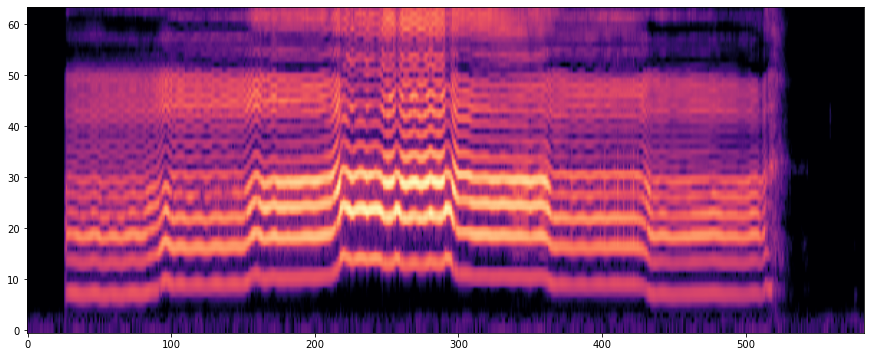

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
ax.imshow(f1_arpeggios_belt_c_a.squeeze(), aspect='auto', origin='lower', cmap='magma')